[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/01-Preprocesamiento.ipynb)

# ⭕ Práctica: Dateset PIMA

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. **Missing values are believed to be encoded with zero values**. The variable names are as follows:

    Number of times pregnant.
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    Diastolic blood pressure (mm Hg).
    Triceps skinfold thickness (mm).
    2-Hour serum insulin (mu U/ml).
    Body mass index (weight in kg/(height in m)^2).
    Diabetes pedigree function.
    Age (years).
    Class variable (0 or 1).

Más información: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
df = pd.read_csv(url,header=None)

df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


⭕ Ejercicio 1

* Modificar el nombre de las columnas de acuerdo a la información anterior.

* Hacer un análisis exploratorio:
    * ¿Qué tipo de variable es cada columna?
    * ¿Hay datos faltantes en alguna columna? Toma en cuenta la información del dataset y auxiliate de histogramas y otras herramientas exploratorias.
    * ¿Qué variable tiene más datos faltantes?
    * ¿Qué rango tienen los datos en cada columna?

In [ ]:
#Modificamos el nombre de las columnas
df.columns = ['TimesPreg', 'glucoseConcent', 'DiastPress', 'TST', 'SerumInsuline', 'BMI', 'DPF', 'Age', 'Class']  # Debe coincidir la longitud
df.head(5)


,TimesPreg,glucoseConcent,DiastPress,TST,SerumInsuline,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print('El tipo de variables es:')
print(df.dtypes)

El tipo de variables es:
TimesPreg           int64
glucoseConcent      int64
DiastPress          int64
TST                 int64
SerumInsuline       int64
BMI               float64
DPF               float64
Age                 int64
Class               int64
dtype: object


In [ ]:
print('Los datos faltantes son:')
zeros_to_check = ['glucoseConcent', 'DiastPress', 'TST', 'SerumInsuline', 'BMI','DPF']
print((df[zeros_to_check] == 0).sum())

Los datos faltantes son:
glucoseConcent      5
DiastPress         35
TST               227
SerumInsuline     374
BMI                11
DPF                 0
dtype: int64


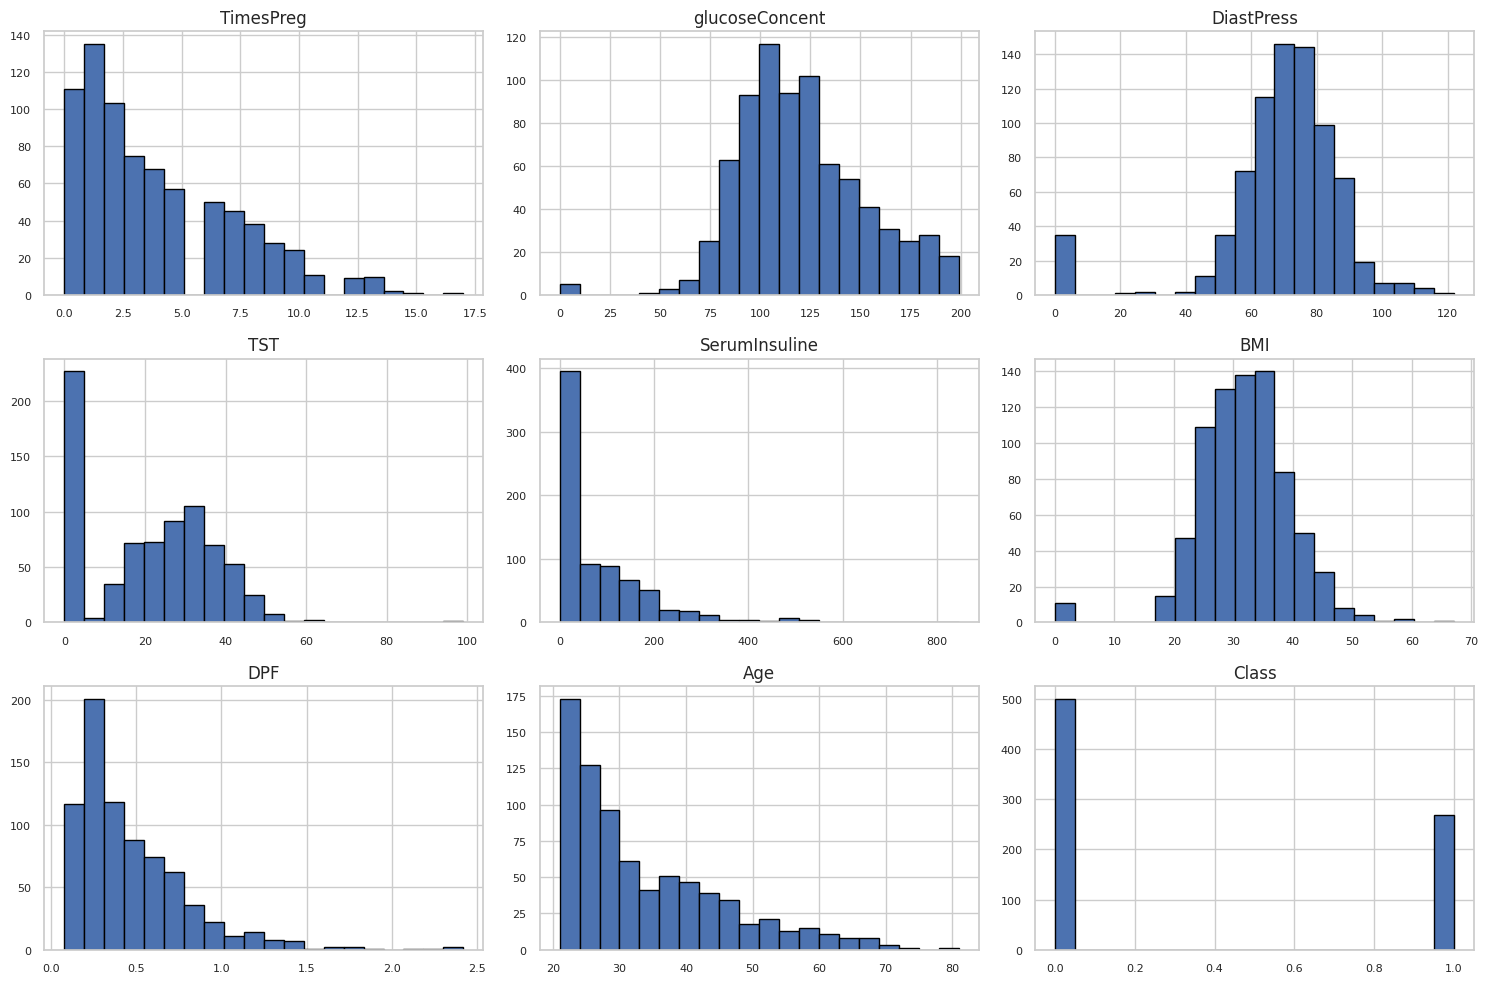

In [ ]:
import seaborn as sns

# Configurar el estilo
sns.set(style="whitegrid")

# Histogramas para todas las variables
df.hist(figsize=(15, 10), bins=20, edgecolor='black', xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

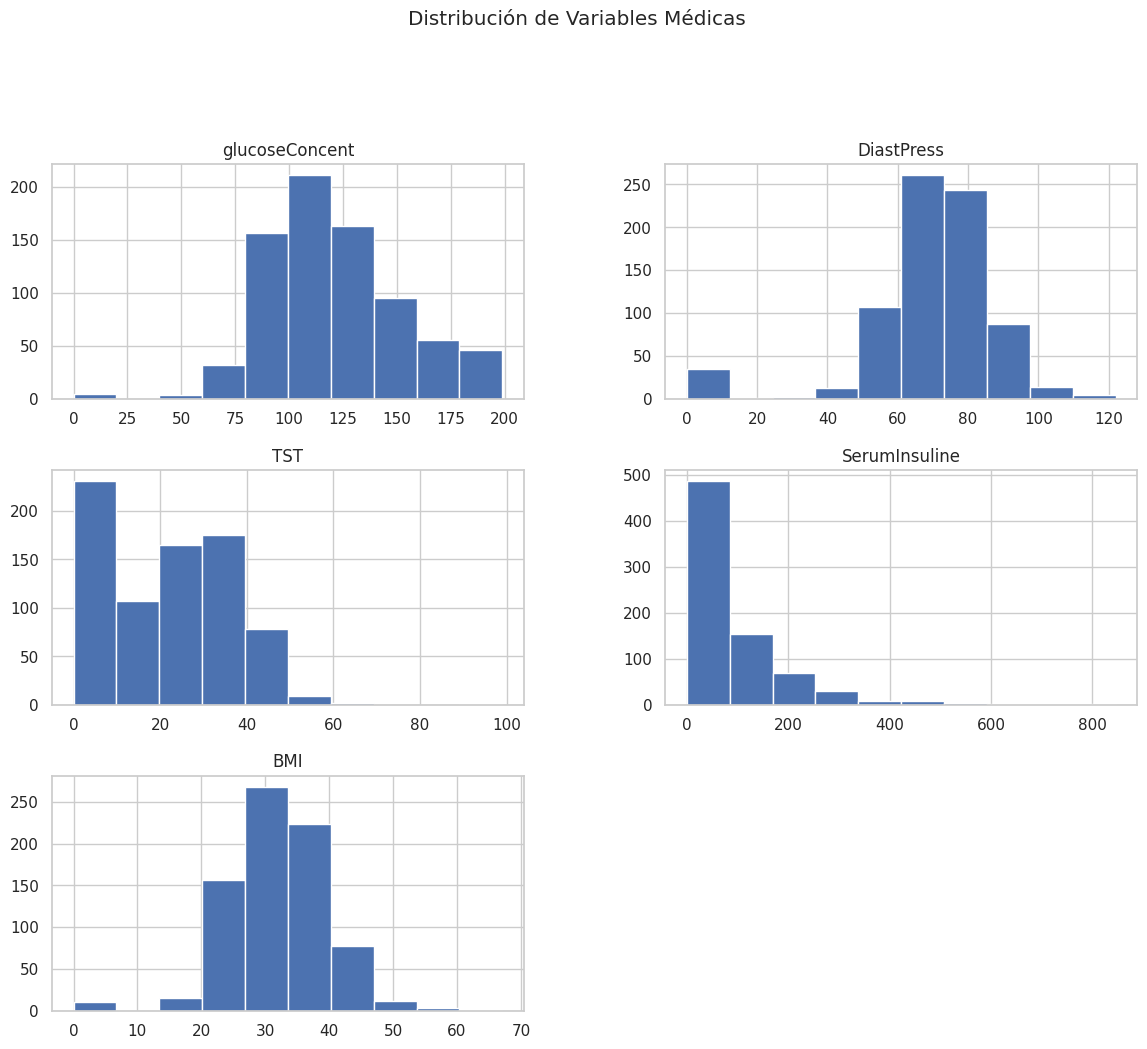

In [ ]:
# Histogramas de variables médicas que no podrían ser cero
df[['glucoseConcent', 'DiastPress', 'TST', 'SerumInsuline', 'BMI']].hist(figsize=(14, 11))
plt.suptitle('Distribución de variables médicas', y=1.02)
plt.show()

In [ ]:
print('¿Qué rango tienen los datos en cada columna?')
df.describe()

¿Qué rango tienen los datos en cada columna?


,TimesPreg,glucoseConcent,DiastPress,TST,SerumInsuline,BMI,DPF,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


⭕ Ejercicio 2

Realizar las siguientes tareas de preprocesamiento:

* Para lididar con los valores faltantes hay dos opciones: Eliminar los renglones con valores faltantes o imputarlos. ¿Cuál eliges y por qué? Realiza esta tarea en todas las columnas.
* Filtrar los valores del BMI en algún rango de tu elección.
* Normalizar todos los valores continuos.
* Cambiar las variables categóricas por *one-hot*

**¿Imputar o eliminar?**

Se elige imputar los valores faltantes, ya que se puede perder  información valiosa si se eliminan los renglones. Son muchos renglones los que habría que eliminar y eso alteraría la estadística del conjunto de datos. Lo mejor es imputar.
No conviene reemplazar los ceros en todas las columnas porque en algunas variables sí serían válidos los ceros.

**Imputación**

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# 1. Identificar columnas donde los ceros son inválidos
zero_cols = ['glucoseConcent', 'DiastPress', 'TST', 'SerumInsuline', 'BMI']

# 2. Reemplazar ceros por NaN
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# 3. Imputar con la mediana
imputer = SimpleImputer(strategy='median')
df[zero_cols] = imputer.fit_transform(df[zero_cols])

# Verificar que no quedan ceros inválidos
print((df[zero_cols] == 0).sum())

glucoseConcent    0
DiastPress        0
TST               0
SerumInsuline     0
BMI               0
dtype: int64


**Filtración del BMI**

Según la OMS:

Bajo peso: < 18.5

Normal: 18.5 - 24.9

Sobrepeso: 25 - 29.9

Obesidad: ≥ 30

In [ ]:
# Límites del rango
bmi_min = 18.5
bmi_max = 24.9

# Filtrar el DataFrame
df_filtered = df[(df['BMI'] >= bmi_min) & (df['BMI'] <= bmi_max)]

# Mostrar las filas que cumplen el criterio
print(f"Pacientes con BMI normal: {len(df_filtered)}/{len(df)}")
print()
print(df_filtered[['BMI', 'Class']])

Pacientes con BMI normal: 102/768

      BMI  Class
2    23.3      1
27   23.2      0
28   22.2      0
32   24.8      0
33   19.9      0
..    ...    ...
717  23.1      0
728  22.9      0
734  23.3      0
749  24.3      1
762  22.5      0

[102 rows x 2 columns]


**Normalización de valores continuos**

Excluiremos variables categóricas como 'Class'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar columnas continuas (excluyendo 'Outcome' y 'Pregnancies')
continuous_cols = ['TimesPreg', 'glucoseConcent', 'DiastPress', 'TST', 'SerumInsuline', 'BMI', 'DPF', 'Age']
scaler = MinMaxScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

# Verificar
print(df[continuous_cols].describe().loc[['min', 'max']])

     TimesPreg  glucoseConcent  DiastPress  TST  SerumInsuline  BMI  DPF  Age
min        0.0             0.0         0.0  0.0            0.0  0.0  0.0  0.0
max        1.0             1.0         1.0  1.0            1.0  1.0  1.0  1.0
